# Results

In this notebook we will perform results analysis comparing the performance of different optimization algorithms - Genetic Algorithms with different operators and parameters, Simulated Annealing and Hill Climbing.

# 1. Imports

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import itertools
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import seaborn as sns

In [124]:
from library.LUSolution import *

In [125]:
from library.selection_and_operators.mutation import *
from library.selection_and_operators.crossover import *
from library.selection_and_operators.selection import tournament_selection
from library.algorithms import *

In [126]:
  from library.results_functions import *

# 2. Genetic Algorithms

Baseline parameters:
- POP_SIZE = 50,
- CROSSOVER_FUNCTION = cycle_crossover,
- MUTATION_FUNCTION = shuffle_mutation,
- NUMBER_OF_TESTS=30,
- MAX_GEN=100,
- S_RANKING_SELECTION=1.5,
- K_TOURNEMENT_SELECTION=5,
- SELECTION_ALGORITHM=tournament_selection,
- XO_PROB=0.9,
- MUT_PROB=0.4,
- MUT_MAX_WINDOW_SIZE=5,
- ELITISM = True,
- VERBOSE = False

### Test crossover, mutation operators and probabilities:

Operators to test:

- Mutation: swap_slots_mutation, inversion_mutation, shuffle_mutation
- Crossover: cycle_crossover, partially_matched_crossover, swap_time_slots_crossover

In [109]:
MAX_GEN=100
NUMBER_OF_TESTS=30

In [110]:
# grid with elitism = True
grid_params = {
    "crossover": [
        {
            "function": partially_matched_crossover,
            "xo_prob": 0.9
        },
        {
            "function": swap_time_slots_crossover,
            "xo_prob": 0.9
        }
    ],
    "mutation": [
        {
            "function": swap_stages_slots_mutation,
            "mut_prob": 0.6
        },
        {
            "function": inversion_mutation,
            "mut_prob": 0.25
        },

    ],
    "elitism": [True]
}

In [111]:
all_results_test1=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs = {}

for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"{mutation_function.__name__}{mut_prob}__{crossover_function.__name__}{xo_prob}__el_{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")

    result = run_experiment_ga(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS,
        ELITISM=elitism
    )
    all_results_test1.append(result)
    fitness_dfs[experiment_name] = result['df']


A saída de streaming foi truncada nas últimas 5000 linhas.
Final best individual in generation 48: 0.8364982774719083
Final best individual in generation 49: 0.8364982774719083
Final best individual in generation 50: 0.8364982774719083
Final best individual in generation 51: 0.8401001631650065
Final best individual in generation 52: 0.8401001631650065
Final best individual in generation 53: 0.8401001631650065
Final best individual in generation 54: 0.8423741910557326
Final best individual in generation 55: 0.8456406070029049
Final best individual in generation 56: 0.8456406070029049
Final best individual in generation 57: 0.8456406070029049
Final best individual in generation 58: 0.8456406070029049
Final best individual in generation 59: 0.8456406070029049
Final best individual in generation 60: 0.8456406070029049
Final best individual in generation 61: 0.846207026673453
Final best individual in generation 62: 0.846207026673453
Final best individual in generation 63: 0.846207026673453


In [94]:
solution=LUGASolution(crossover_function=cycle_crossover, mutation_function=shuffle_mutation)

In [95]:
solution

[[31, 9, 33, 15, 28, 17, 22], [3, 1, 20, 26, 29, 25, 23], [27, 12, 6, 13, 14, 30, 16], [7, 5, 34, 2, 32, 8, 21], [0, 10, 11, 4, 18, 19, 24]]

In [96]:
mut=solution.mutation(mut_prob=1)

In [97]:
type(mut)

library.LUSolution.LUGASolution

In [102]:
initial_population = [
        LUGASolution(
            crossover_function=cycle_crossover,
            mutation_function=shuffle_mutation
        )
        for _ in range(50)
        ]

In [103]:
best_solution, fitness_history = genetic_algorithm(
            initial_population=initial_population,
            max_gen=5,
            selection_algorithm=tournament_selection,
            maximization = True,
            xo_prob = 1,
            mut_prob =1,
            elitism = True,
            verbose = False,
        )

ValueError: The number of stages and time slots does not match the ones provided

In [112]:
MAX_GEN=100
NUMBER_OF_TESTS=30

In [113]:
grid_params = {
    "crossover": [
        {
            "function": partially_matched_crossover,
            "xo_prob": 0.9
        },
        {
            "function": swap_time_slots_crossover,
            "xo_prob": 0.9
        }
    ],
    "mutation": [
        {
            "function": swap_stages_slots_mutation,
            "mut_prob": 0.6
        },
        {
            "function": inversion_mutation,
            "mut_prob": 0.25
        },


    ],
    "elitism": [False]
}

In [114]:
all_results_test2=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs={} #store the results
# Run experiment to test all the different combinations of parameters in the grid
for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"{mutation_function.__name__}{mut_prob}__{crossover_function.__name__}{xo_prob}__{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")

    result = run_experiment_ga(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS,
        ELITISM=elitism
    )
    all_results_test2.append(result)
    fitness_dfs[experiment_name] = result['df']


A saída de streaming foi truncada nas últimas 5000 linhas.
Final best individual in generation 48: 0.8343301924010152
Final best individual in generation 49: 0.8343301924010152
Final best individual in generation 50: 0.8343301924010152
Final best individual in generation 51: 0.8343301924010152
Final best individual in generation 52: 0.8343301924010152
Final best individual in generation 53: 0.8369119479948189
Final best individual in generation 54: 0.8369119479948189
Final best individual in generation 55: 0.8369119479948189
Final best individual in generation 56: 0.8380593949253985
Final best individual in generation 57: 0.8380593949253985
Final best individual in generation 58: 0.8380593949253985
Final best individual in generation 59: 0.8380593949253985
Final best individual in generation 60: 0.8380593949253985
Final best individual in generation 61: 0.8380593949253985
Final best individual in generation 62: 0.8380593949253985
Final best individual in generation 63: 0.83805939492539

In [ ]:
def avg_elapsed_time_table(all_results):
    pd.set_option('display.max_colwidth', None)
    data = []
    for result in all_results:
        data.append({
            "Experience Name": result['name'],
            "Elapsed Time Avg": result['avg_elapsed_time']
        })
    avg_elapsed_time = pd.DataFrame(data)
    avg_elapsed_time.index = range(1, len(all_results)+1)
    return avg_elapsed_time

In [ ]:
avg_elapsed_time_table(all_results=all_results_test1)

,Experience Name,Elapsed Time Avg
1,swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True,55.396368
2,inversion_mutation0.25__partially_matched_crossover0.9__el_True,53.216690
3,shuffle_mutation0.25__partially_matched_crossover0.9__el_True,53.705165
4,swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__el_True,53.907018
5,inversion_mutation0.25__swap_time_slots_crossover0.9__el_True,75.031230
6,shuffle_mutation0.25__swap_time_slots_crossover0.9__el_True,55.771556


In [ ]:
avg_elapsed_time_table(all_results=all_results_test2)

,Experience Name,Elapsed Time Avg
1,swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False,53.211627
2,inversion_mutation0.25__partially_matched_crossover0.9__False,57.630213
3,shuffle_mutation0.25__partially_matched_crossover0.9__False,87.398731
4,swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__False,112.538197
5,inversion_mutation0.25__swap_time_slots_crossover0.9__False,100.920927
6,shuffle_mutation0.25__swap_time_slots_crossover0.9__False,82.782599


# 3. Hill Climbing

In [127]:
MAX_ITER=100
NUMBER_OF_TESTS=30

In [128]:
result_hc=run_experiment_hc(
EXPERIMENT_NAME = f"hc",
NUMBER_OF_TESTS=NUMBER_OF_TESTS,
MAX_GEN=MAX_ITER) # test hill climbing


Iteration 0 of the HC algorithm


Iteration 1 of the HC algorithm


Iteration 2 of the HC algorithm


Iteration 3 of the HC algorithm


Iteration 4 of the HC algorithm


Iteration 5 of the HC algorithm


Iteration 6 of the HC algorithm


Iteration 7 of the HC algorithm


Iteration 8 of the HC algorithm


Iteration 9 of the HC algorithm


Iteration 10 of the HC algorithm


Iteration 11 of the HC algorithm


Iteration 12 of the HC algorithm


Iteration 13 of the HC algorithm


Iteration 14 of the HC algorithm


Iteration 15 of the HC algorithm


Iteration 16 of the HC algorithm


Iteration 17 of the HC algorithm


Iteration 18 of the HC algorithm


Iteration 19 of the HC algorithm


Iteration 20 of the HC algorithm


Iteration 21 of the HC algorithm


Iteration 22 of the HC algorithm


Iteration 23 of the HC algorithm


Iteration 24 of the HC algorithm


Iteration 25 of the HC algorithm


Iteration 26 of the HC algorithm


Iteration 27 of the HC algorithm


Iteration 28 of the HC algori

# 4. Simulated Annealing

In [129]:
MAX_ITER=100
NUMBER_OF_TESTS=30
C=[1.5, 2.5]
L=[10, 25]
H=[5, 20]

In [130]:
all_results_sa=[]
fitness_dfs_sa = {}

# test different combinations of parameters for SA
for c in C:
    for l in L:
        for h in H:
            experiment_name=f"sa__C_{c}__L_{l}__H_{h}"
            print(f"\n\nRunning experiment: {experiment_name}")
            result=run_experiment_sa(
            EXPERIMENT_NAME = experiment_name,
            NUMBER_OF_TESTS=NUMBER_OF_TESTS,
            MAX_GEN=MAX_ITER,
            C=c,
            L=l,
            H=h,
            VERBOSE=False)
            all_results_sa.append(result)
            fitness_dfs_sa[experiment_name]=result['df']



Running experiment: sa__C_1.5__L_10__H_5

Iteration 0 of the SA algorithm


Iteration 1 of the SA algorithm


Iteration 2 of the SA algorithm


Iteration 3 of the SA algorithm


Iteration 4 of the SA algorithm


Iteration 5 of the SA algorithm


Iteration 6 of the SA algorithm


Iteration 7 of the SA algorithm


Iteration 8 of the SA algorithm


Iteration 9 of the SA algorithm


Iteration 10 of the SA algorithm


Iteration 11 of the SA algorithm


Iteration 12 of the SA algorithm


Iteration 13 of the SA algorithm


Iteration 14 of the SA algorithm


Iteration 15 of the SA algorithm


Iteration 16 of the SA algorithm


Iteration 17 of the SA algorithm


Iteration 18 of the SA algorithm


Iteration 19 of the SA algorithm


Iteration 20 of the SA algorithm


Iteration 21 of the SA algorithm


Iteration 22 of the SA algorithm


Iteration 23 of the SA algorithm


Iteration 24 of the SA algorithm


Iteration 25 of the SA algorithm


Iteration 26 of the SA algorithm


Iteration 27 of the S

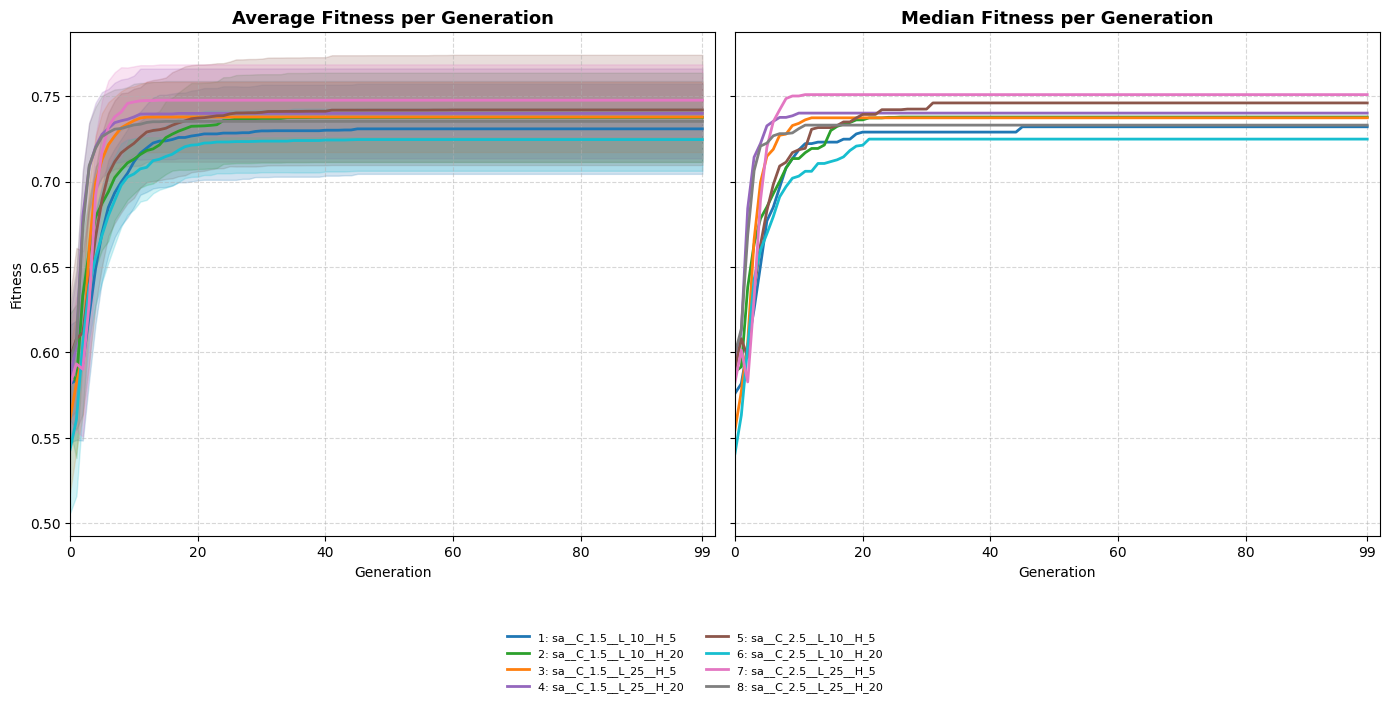

In [131]:
plot_avg_median_fit_per_generation(fitness_dfs_sa)

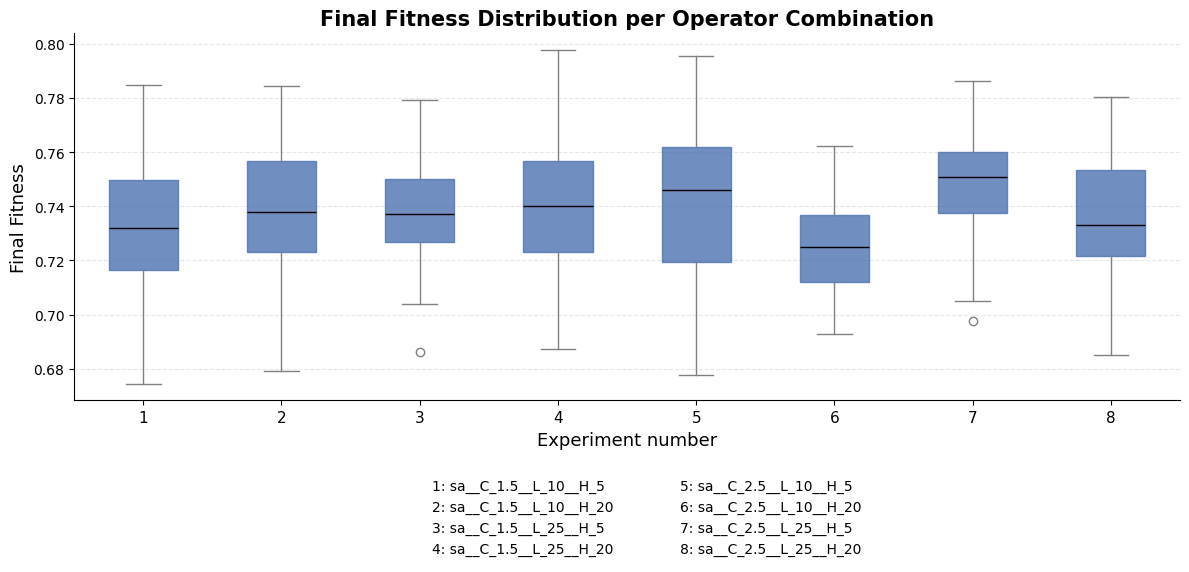

In [132]:
boxplots_final_fitness(fitness_dfs_sa)

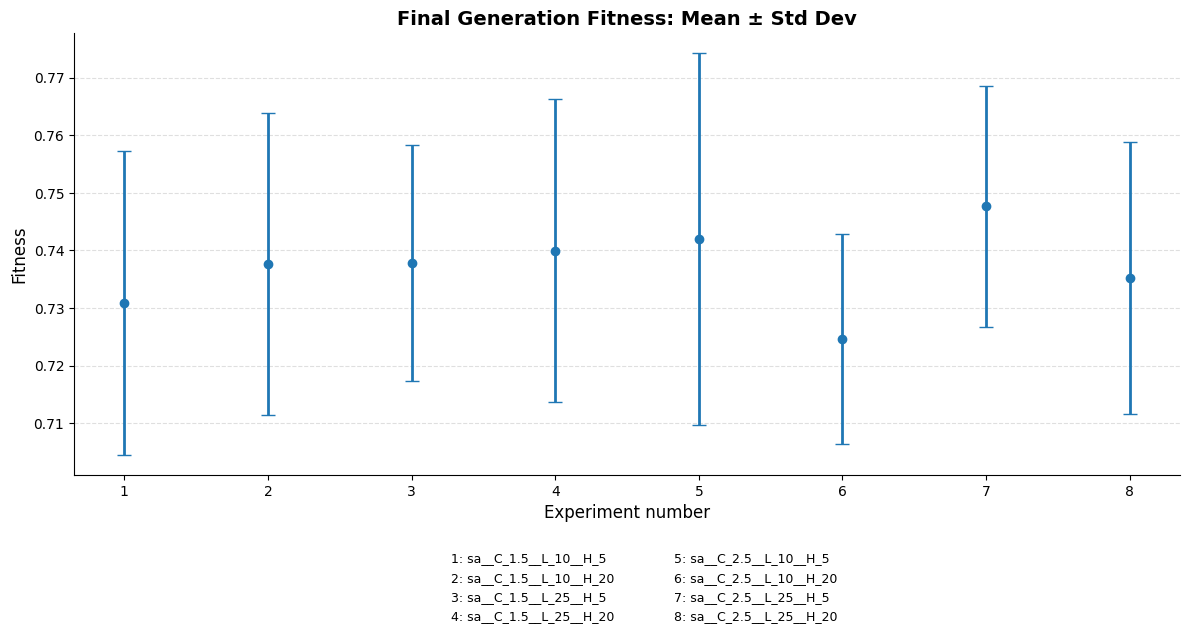

In [133]:
plot_mean_std_error(fitness_dfs_sa)

In [134]:
compute_wilcoxon_pvalues(fitness_dfs_sa)

,sa__C_1.5__L_10__H_5,sa__C_1.5__L_10__H_20,sa__C_1.5__L_25__H_5,sa__C_1.5__L_25__H_20,sa__C_2.5__L_10__H_5,sa__C_2.5__L_10__H_20,sa__C_2.5__L_25__H_5,sa__C_2.5__L_25__H_20
sa__C_1.5__L_10__H_5,NaN,0.309,0.309,0.289,0.245,0.280,0.016,0.339
sa__C_1.5__L_10__H_20,0.309,NaN,1.000,0.792,0.382,0.021,0.067,0.746
sa__C_1.5__L_25__H_5,0.309,1.000,NaN,0.598,0.393,0.011,0.092,0.746
sa__C_1.5__L_25__H_20,0.289,0.792,0.598,NaN,0.792,0.004,0.058,0.280
sa__C_2.5__L_10__H_5,0.245,0.382,0.393,0.792,NaN,0.007,0.543,0.556
sa__C_2.5__L_10__H_20,0.280,0.021,0.011,0.004,0.007,NaN,0.000,0.055
sa__C_2.5__L_25__H_5,0.016,0.067,0.092,0.058,0.543,0.000,NaN,0.045
sa__C_2.5__L_25__H_20,0.339,0.746,0.746,0.280,0.556,0.055,0.045,NaN


# 6. New Representation of Solution for GA

In [135]:
MAX_GEN=100
NUMBER_OF_TESTS=30

In [136]:
grid_params = {
    "crossover": [
        # {
        #     "function": crossover_KAP,
        #     "xo_prob": random.uniform(1/3, 2/3)
        # },
        {
            "function": crossover_KAP,
            "xo_prob": random.uniform(2/3, 1)
        }
    ],
    "mutation": [
        {
            "function": mutation_KA,
            "mut_prob": random.uniform(0, 1/3)
        },
        # {
        #     "function": mutation_KA,
        #     "mut_prob": random.uniform(1/3, 2/3)
        # },


    ],
    "elitism": [True, False]
}

In [137]:
all_results_test_new_repr=[] # list to store the results for all the experiments
grid = list(itertools.product(grid_params["crossover"], grid_params["mutation"], grid_params["elitism"]))
fitness_dfs_new_repr = {}

for crossover_cfg, mutation_cfg, elitism in grid:

    crossover_function = crossover_cfg["function"]
    xo_prob = crossover_cfg["xo_prob"]
    mutation_function = mutation_cfg["function"]
    mut_prob = mutation_cfg["mut_prob"]
    experiment_name = f"KAP_{mutation_function.__name__}{round(mut_prob,2)}__{crossover_function.__name__}{round(xo_prob,2)}__el_{elitism}"
    print(f"\n\nRunning experiment: {experiment_name}")

    result = run_experiment_ga_KAP(
        EXPERIMENT_NAME=experiment_name,
        MUTATION_FUNCTION=mutation_function,
        CROSSOVER_FUNCTION=crossover_function,
        MUT_PROB=mut_prob,
        XO_PROB=xo_prob,
        MAX_GEN=MAX_GEN,
        NUMBER_OF_TESTS=NUMBER_OF_TESTS,
        ELITISM=elitism
    )
    all_results_test_new_repr.append(result)
    fitness_dfs_new_repr[experiment_name] = result['df']


A saída de streaming foi truncada nas últimas 5000 linhas.
Final best individual in generation 48: 0.7378451985131059
Final best individual in generation 49: 0.7378451985131059
Final best individual in generation 50: 0.7378451985131059
Final best individual in generation 51: 0.7378451985131059
Final best individual in generation 52: 0.7378451985131059
Final best individual in generation 53: 0.7378451985131059
Final best individual in generation 54: 0.7378451985131059
Final best individual in generation 55: 0.7378451985131059
Final best individual in generation 56: 0.7378451985131059
Final best individual in generation 57: 0.7378451985131059
Final best individual in generation 58: 0.7378451985131059
Final best individual in generation 59: 0.7378451985131059
Final best individual in generation 60: 0.7378451985131059
Final best individual in generation 61: 0.7378451985131059
Final best individual in generation 62: 0.7378451985131059
Final best individual in generation 63: 0.73784519851310

# 7. Load CSVs with results

In [138]:
# Initialize dictionaries to store results
fitness_dfs_sa = {}
results_hc = {}
fitness_dfs_ga_el_true = {}
fitness_dfs_ga_el_false = {}
fitness_dfs_ga = fitness_dfs_ga_el_true | fitness_dfs_ga_el_false
fitness_dfs_ga_kap = {}



folder_path = "./results"

# Open the files
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)

        key = filename[:-4]  # Remove ".csv"

        # Determine category by prefix
        if filename.startswith("sa"):
            fitness_dfs_sa[key] = df
        elif filename.startswith("hc"):
            results_hc[key] = df
        elif filename.startswith('KAP'):
            fitness_dfs_ga_kap[key] = df
        else:
            fitness_dfs_ga[key] = df

# 8. Compare GA experiments

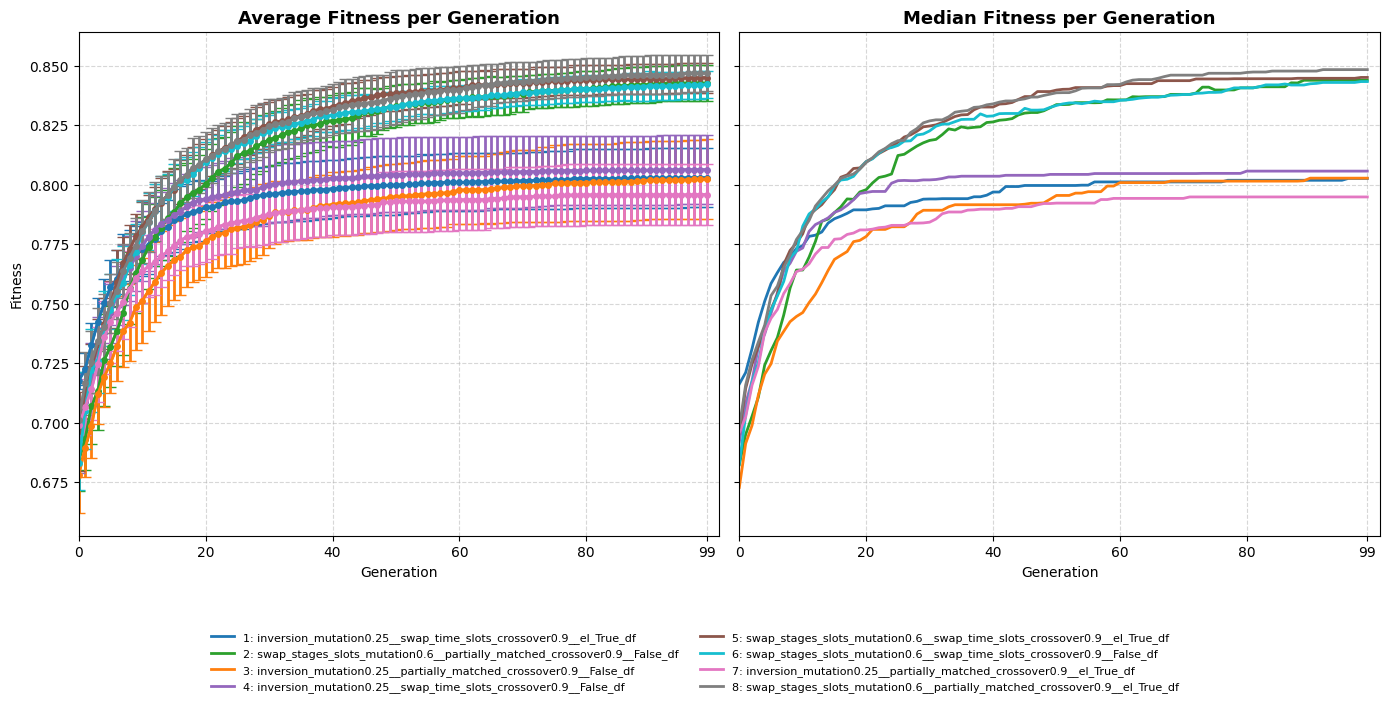

In [139]:
plot_avg_median_fit_per_generation(fitness_dfs_ga, error_bar=True)

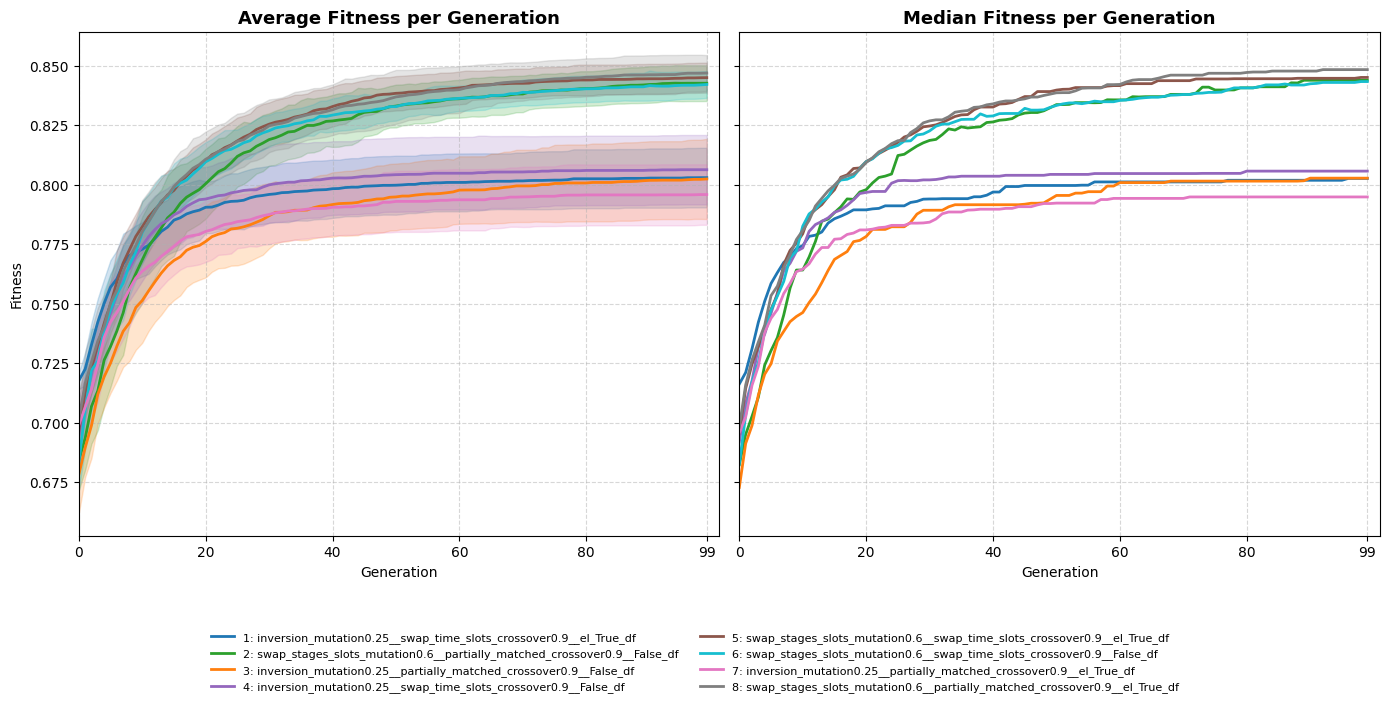

In [140]:
plot_avg_median_fit_per_generation(fitness_dfs_ga, error_bar=False)

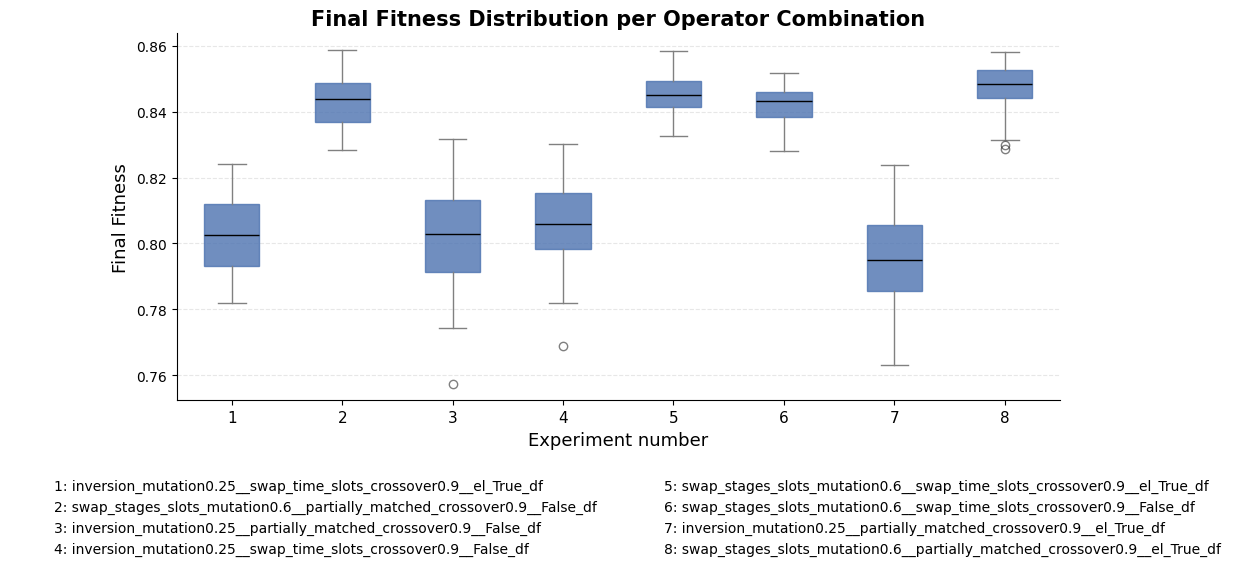

In [141]:
boxplots_final_fitness(fitness_dfs_ga)

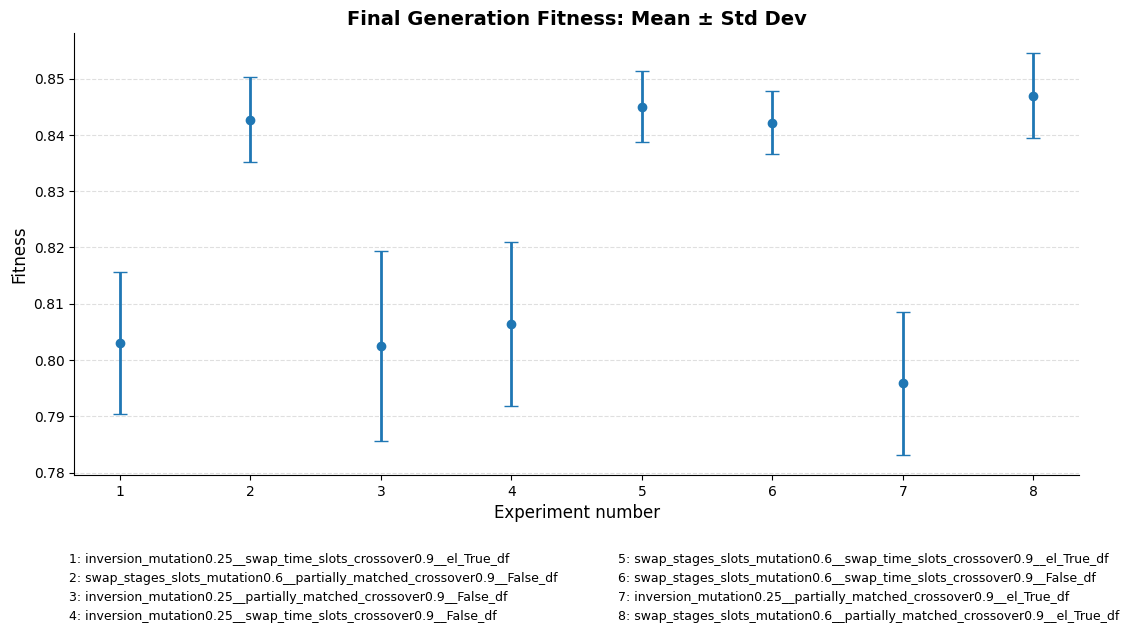

In [142]:
plot_mean_std_error(fitness_dfs_ga)

In [143]:
compute_wilcoxon_pvalues(fitness_dfs_ga)

,inversion_mutation0.25__swap_time_slots_crossover0.9__el_True_df,swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False_df,inversion_mutation0.25__partially_matched_crossover0.9__False_df,inversion_mutation0.25__swap_time_slots_crossover0.9__False_df,swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__el_True_df,swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__False_df,inversion_mutation0.25__partially_matched_crossover0.9__el_True_df,swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True_df
inversion_mutation0.25__swap_time_slots_crossover0.9__el_True_df,NaN,0.000,0.919,0.253,0.000,0.000,0.109,0.000
swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False_df,0.000,NaN,0.000,0.000,0.262,0.824,0.000,0.020
inversion_mutation0.25__partially_matched_crossover0.9__False_df,0.919,0.000,NaN,0.584,0.000,0.000,0.080,0.000
inversion_mutation0.25__swap_time_slots_crossover0.9__False_df,0.253,0.000,0.584,NaN,0.000,0.000,0.004,0.000
swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__el_True_df,0.000,0.262,0.000,0.000,NaN,0.088,0.000,0.253
swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__False_df,0.000,0.824,0.000,0.000,0.088,NaN,0.000,0.009
inversion_mutation0.25__partially_matched_crossover0.9__el_True_df,0.109,0.000,0.080,0.004,0.000,0.000,NaN,0.000
swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True_df,0.000,0.020,0.000,0.000,0.253,0.009,0.000,NaN


# 9. Compare GA with diferent a representation

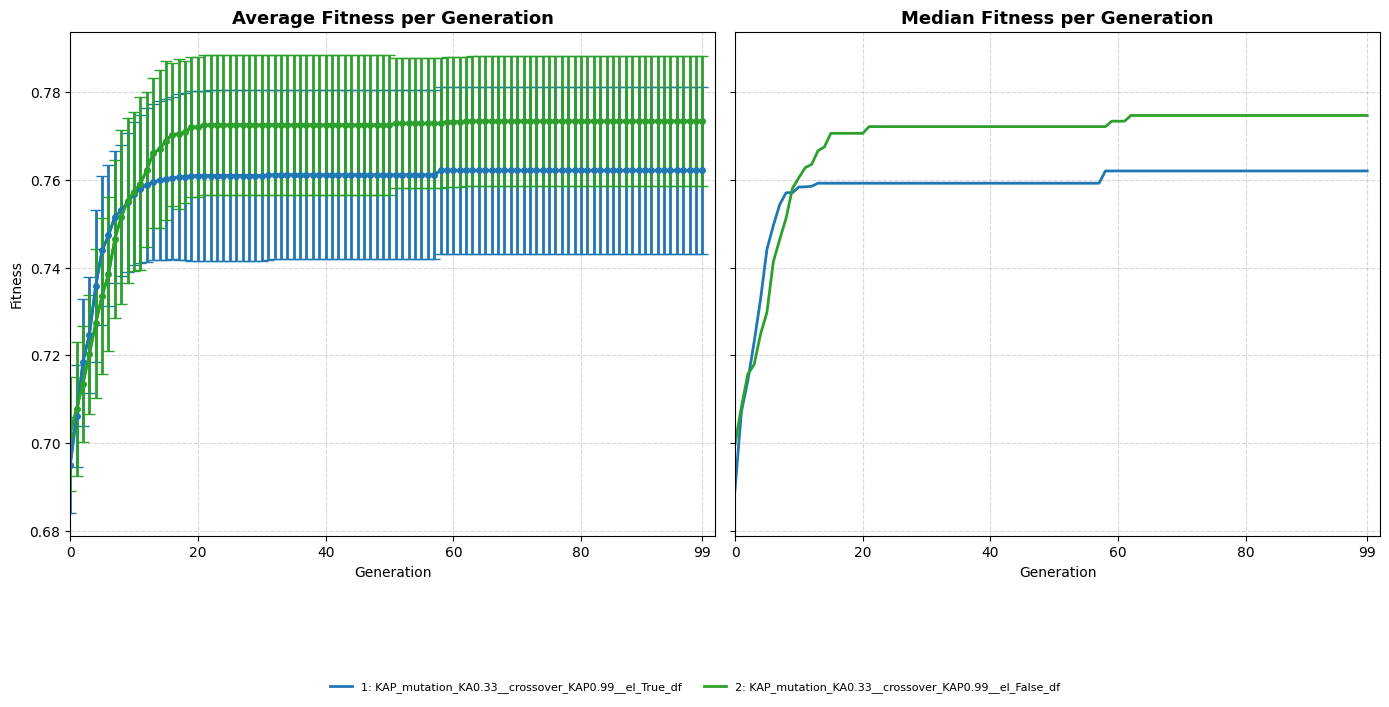

In [144]:
plot_avg_median_fit_per_generation(fitness_dfs_ga_kap, error_bar=True)

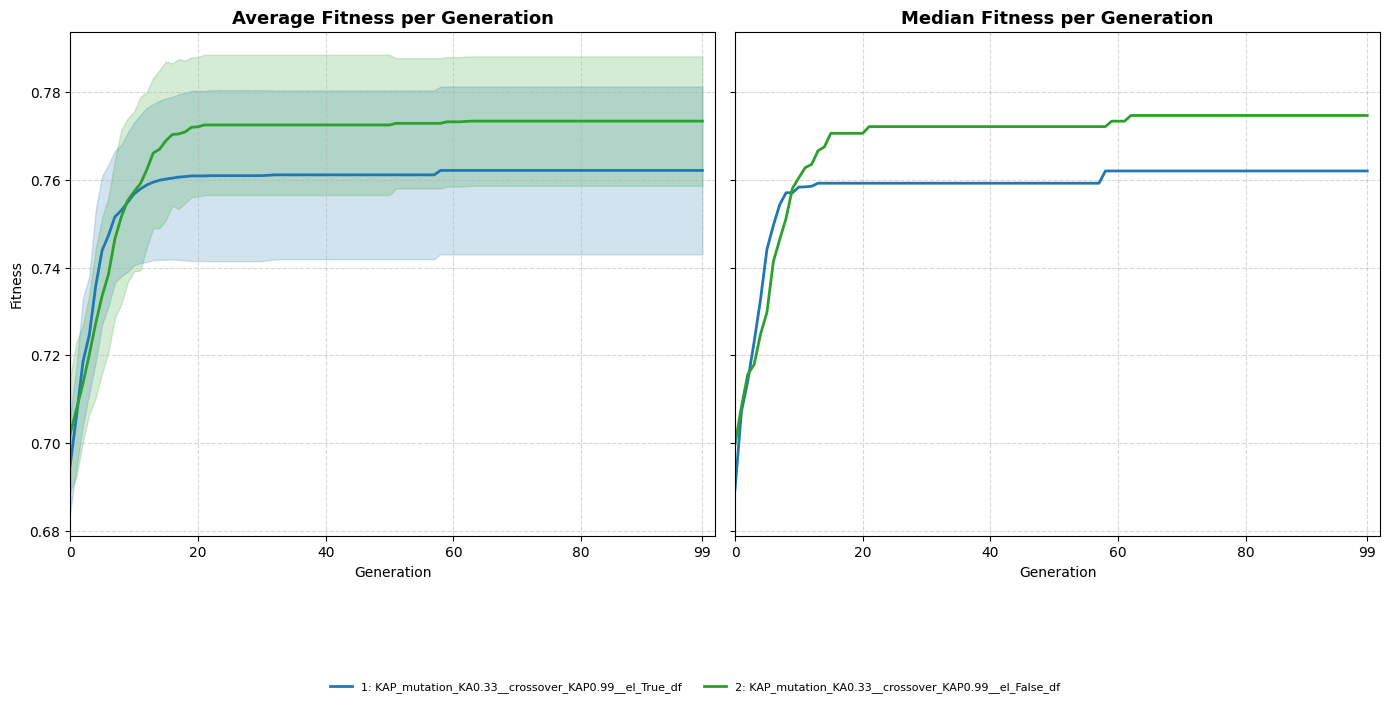

In [145]:
plot_avg_median_fit_per_generation(fitness_dfs_ga_kap, error_bar=False)

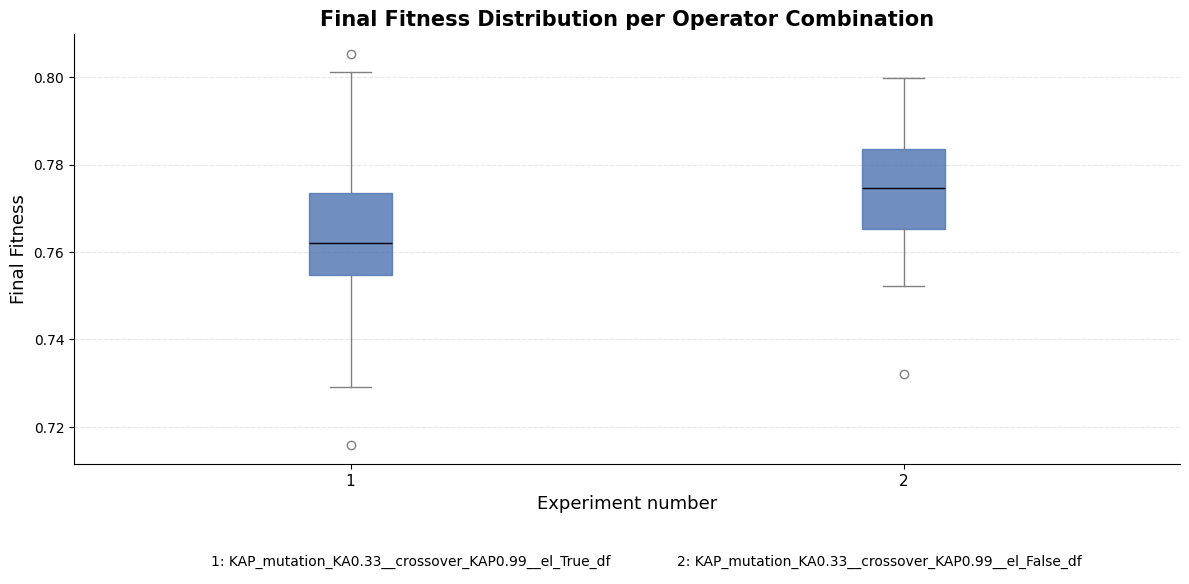

In [146]:
boxplots_final_fitness(fitness_dfs_ga_kap)

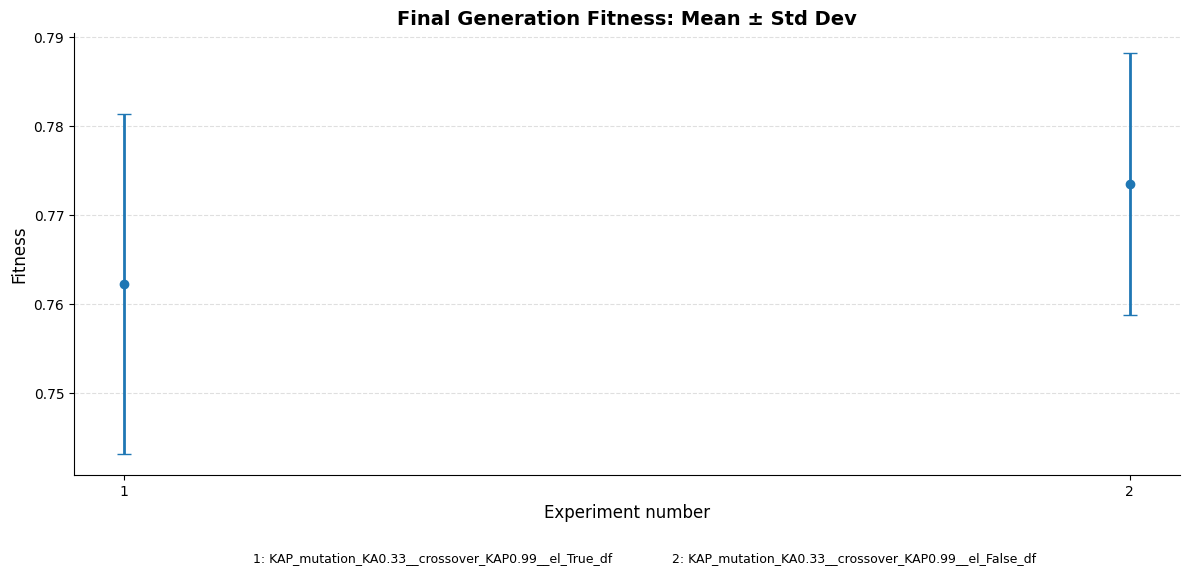

In [147]:
plot_mean_std_error(fitness_dfs_ga_kap)

In [148]:
compute_wilcoxon_pvalues(fitness_dfs_ga)

,inversion_mutation0.25__swap_time_slots_crossover0.9__el_True_df,swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False_df,inversion_mutation0.25__partially_matched_crossover0.9__False_df,inversion_mutation0.25__swap_time_slots_crossover0.9__False_df,swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__el_True_df,swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__False_df,inversion_mutation0.25__partially_matched_crossover0.9__el_True_df,swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True_df
inversion_mutation0.25__swap_time_slots_crossover0.9__el_True_df,NaN,0.000,0.919,0.253,0.000,0.000,0.109,0.000
swap_stages_slots_mutation0.6__partially_matched_crossover0.9__False_df,0.000,NaN,0.000,0.000,0.262,0.824,0.000,0.020
inversion_mutation0.25__partially_matched_crossover0.9__False_df,0.919,0.000,NaN,0.584,0.000,0.000,0.080,0.000
inversion_mutation0.25__swap_time_slots_crossover0.9__False_df,0.253,0.000,0.584,NaN,0.000,0.000,0.004,0.000
swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__el_True_df,0.000,0.262,0.000,0.000,NaN,0.088,0.000,0.253
swap_stages_slots_mutation0.6__swap_time_slots_crossover0.9__False_df,0.000,0.824,0.000,0.000,0.088,NaN,0.000,0.009
inversion_mutation0.25__partially_matched_crossover0.9__el_True_df,0.109,0.000,0.080,0.004,0.000,0.000,NaN,0.000
swap_stages_slots_mutation0.6__partially_matched_crossover0.9__el_True_df,0.000,0.020,0.000,0.000,0.253,0.009,0.000,NaN


# 10. Compare SA experiments

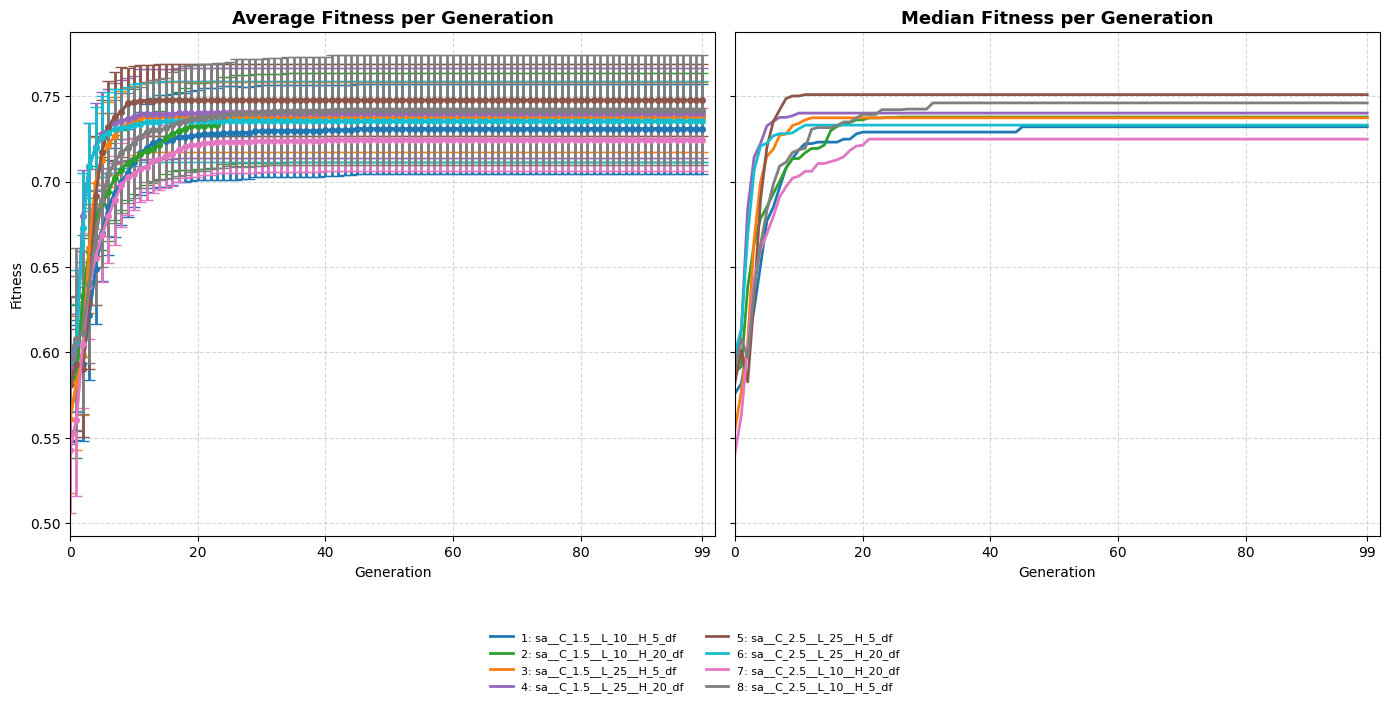

In [149]:
plot_avg_median_fit_per_generation(fitness_dfs_sa, error_bar=True)

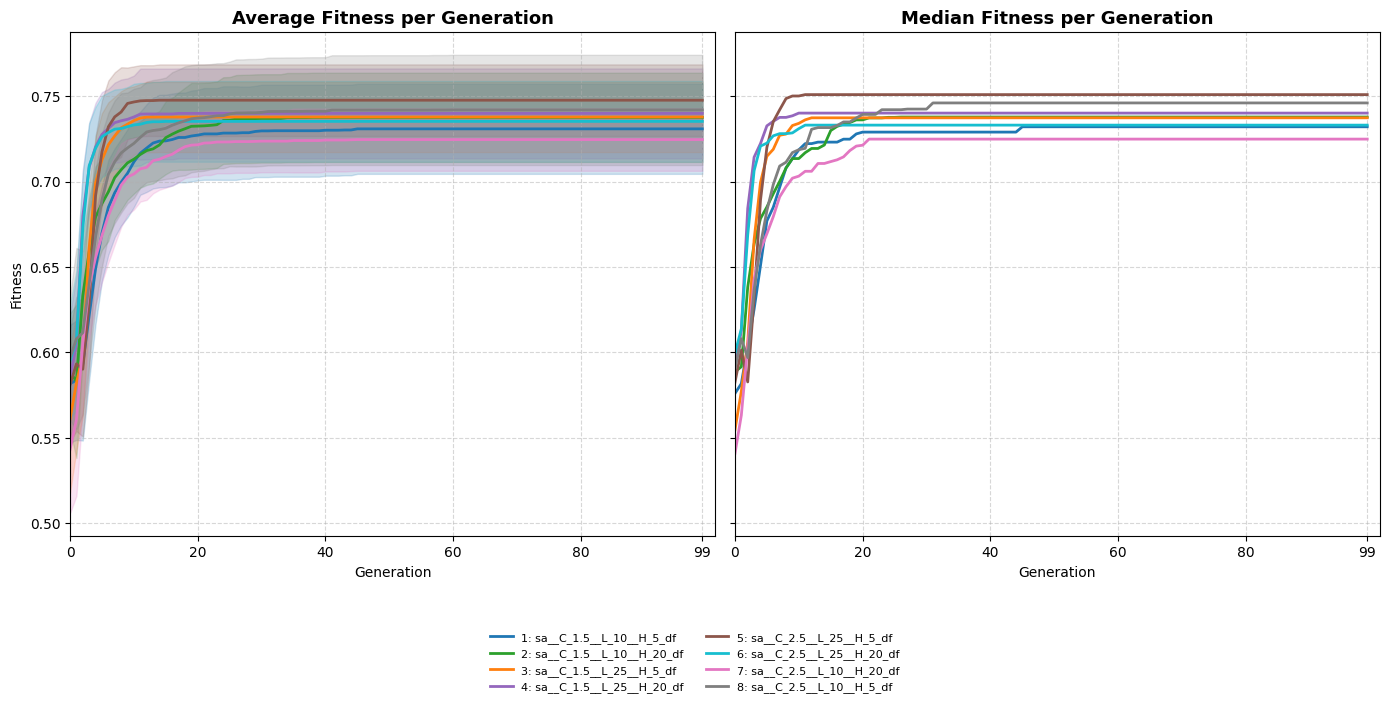

In [150]:
plot_avg_median_fit_per_generation(fitness_dfs_sa, error_bar=False)

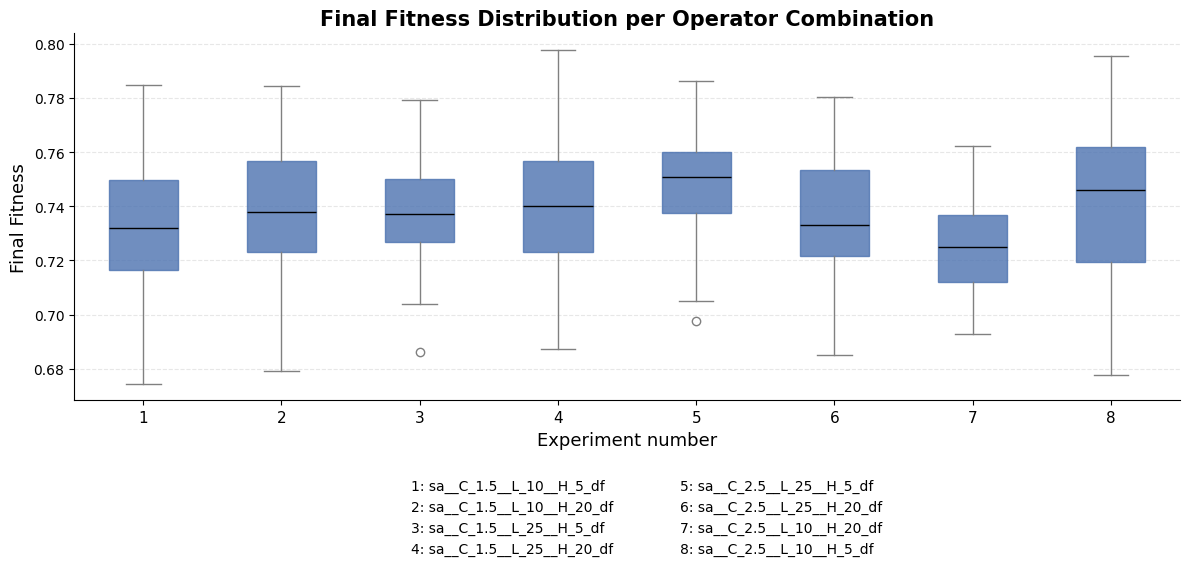

In [151]:
boxplots_final_fitness(fitness_dfs_sa)

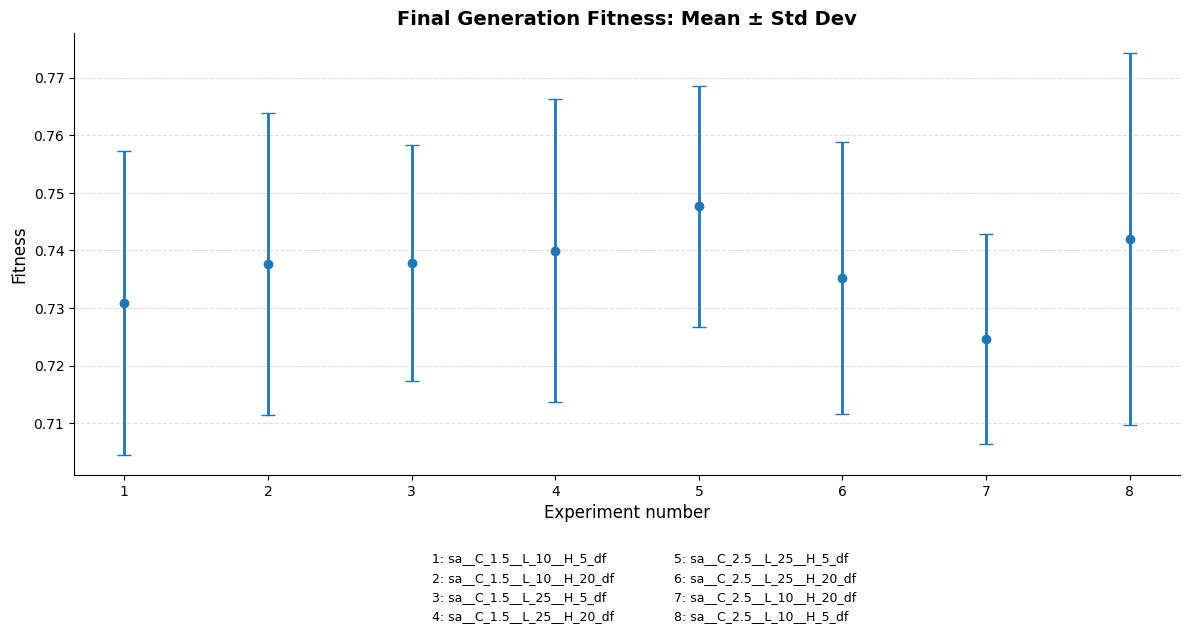

In [152]:
plot_mean_std_error(fitness_dfs_sa)

In [153]:
compute_wilcoxon_pvalues(fitness_dfs_sa)

,sa__C_1.5__L_10__H_5_df,sa__C_1.5__L_10__H_20_df,sa__C_1.5__L_25__H_5_df,sa__C_1.5__L_25__H_20_df,sa__C_2.5__L_25__H_5_df,sa__C_2.5__L_25__H_20_df,sa__C_2.5__L_10__H_20_df,sa__C_2.5__L_10__H_5_df
sa__C_1.5__L_10__H_5_df,NaN,0.309,0.309,0.289,0.016,0.339,0.280,0.245
sa__C_1.5__L_10__H_20_df,0.309,NaN,1.000,0.792,0.067,0.746,0.021,0.382
sa__C_1.5__L_25__H_5_df,0.309,1.000,NaN,0.598,0.092,0.746,0.011,0.393
sa__C_1.5__L_25__H_20_df,0.289,0.792,0.598,NaN,0.058,0.280,0.004,0.792
sa__C_2.5__L_25__H_5_df,0.016,0.067,0.092,0.058,NaN,0.045,0.000,0.543
sa__C_2.5__L_25__H_20_df,0.339,0.746,0.746,0.280,0.045,NaN,0.055,0.556
sa__C_2.5__L_10__H_20_df,0.280,0.021,0.011,0.004,0.000,0.055,NaN,0.007
sa__C_2.5__L_10__H_5_df,0.245,0.382,0.393,0.792,0.543,0.556,0.007,NaN


# 11. HC Result

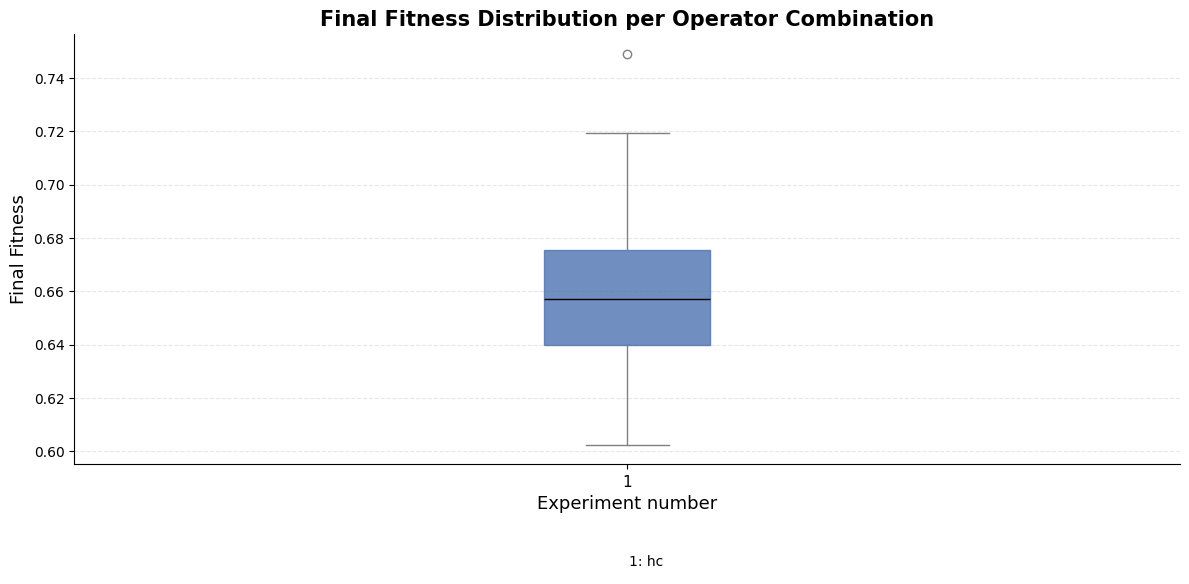

In [154]:
boxplots_final_fitness(results_hc)

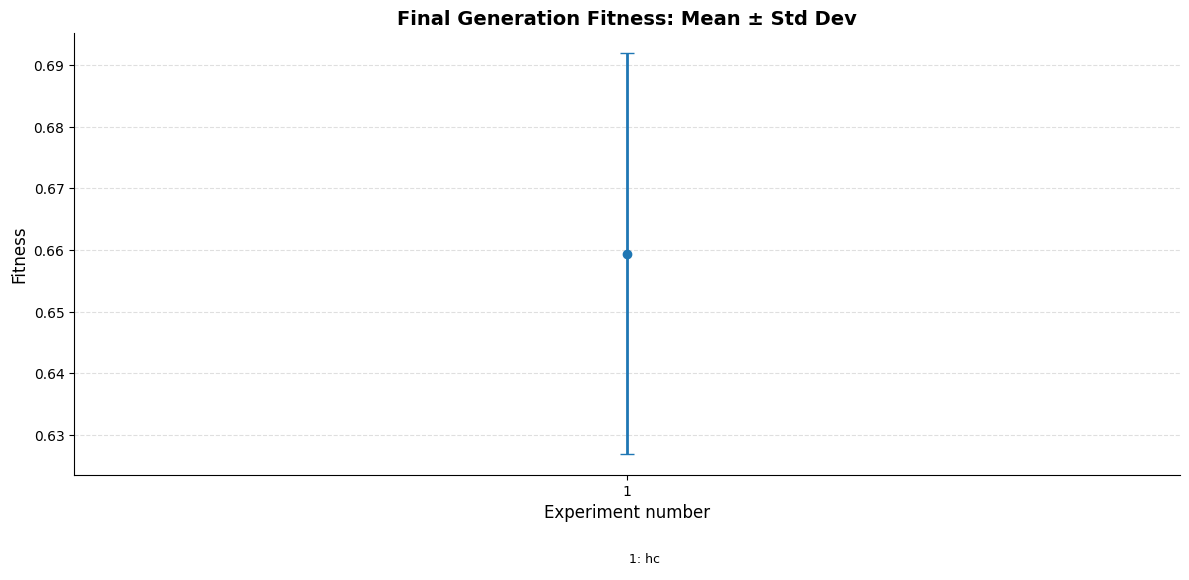

In [155]:
plot_mean_std_error(results_hc)

# 12. Compare GA, SA and HC

In [ ]:
# Store the best results of each algorithm - GA, SA and HC
results_ga_sa_hc={}
results_ga_sa_hc['BEST_SA'] = pd.DataFrame({
    "Fitness_max": fitness_dfs_sa['sa__C_1.5__L_10__H_20_df'].iloc[:, -1]
})

results_ga_sa_hc['BEST_GA'] = pd.DataFrame({
    "Fitness_max": fitness_dfs_ga['inversion_mutation0.25__partially_matched_crossover0.9__el_True_df'].iloc[:, -1]
})

results_ga_sa_hc['BEST_HC'] = results_hc['hc']

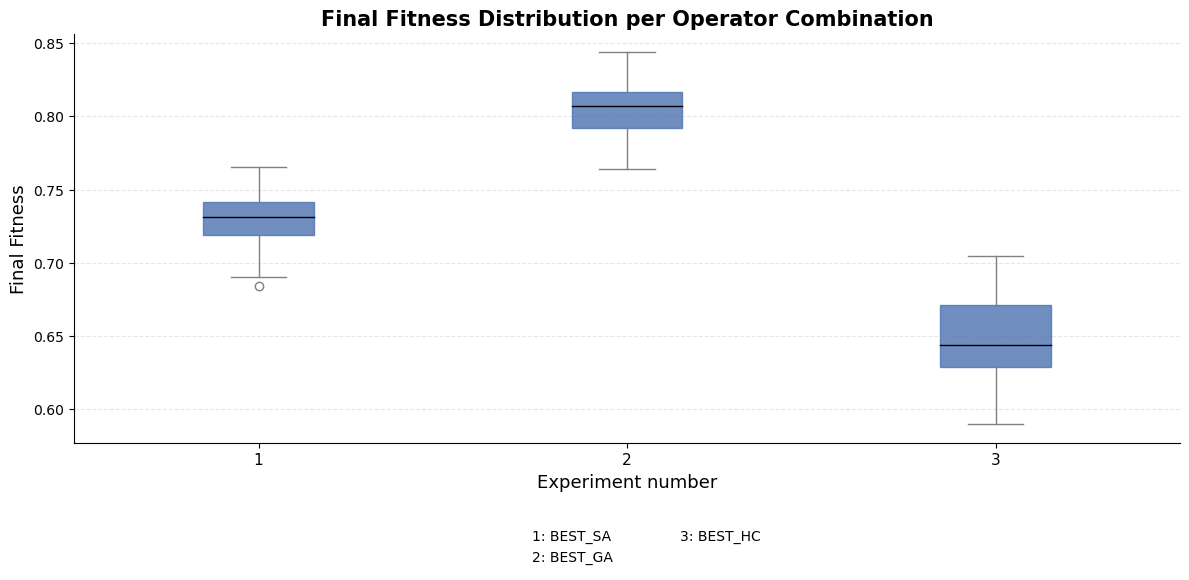

In [ ]:
boxplots_final_fitness(results_ga_sa_hc)

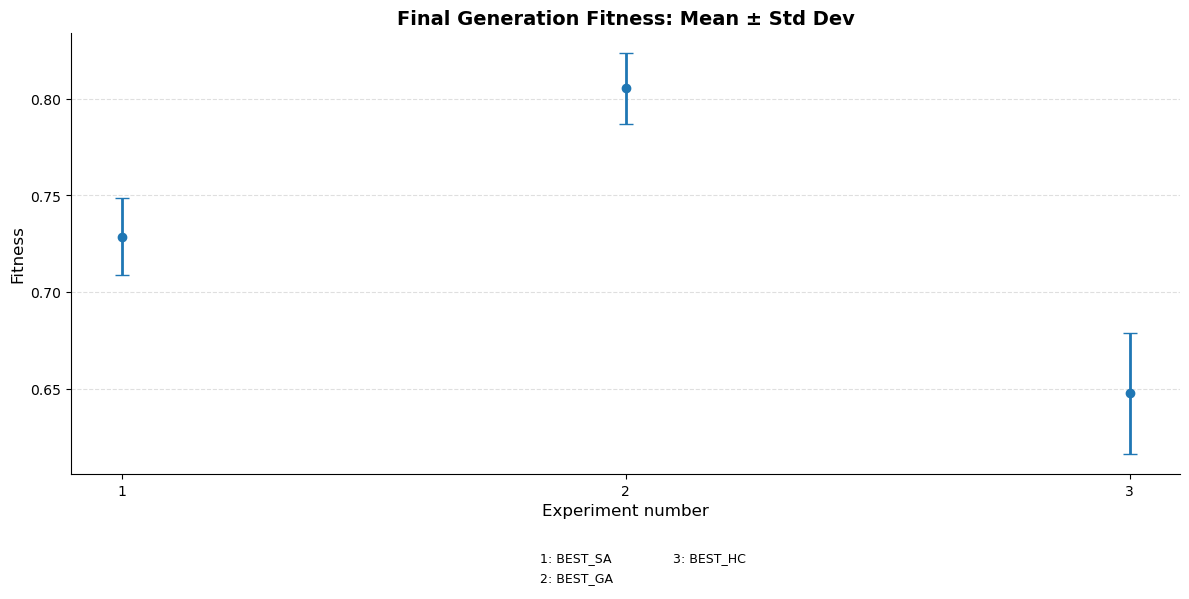

In [ ]:
plot_mean_std_error(results_ga_sa_hc)

# 13. Best algorithm solution with artists stages and slots

In [ ]:
initial_population = [
    LUGASolution(
        crossover_function=CROSSOVER_FUNCTION,
        mutation_function=MUTATION_FUNCTION
    )
    for _ in range(50)
    ]
best_solution=genetic_algorithm(
    initial_population=initial_population,
    max_gen=100,
    selection_algorithm=tournament_selection,
    k_tournment_selection = 2,
    maximization = True,
    xo_prob=,
    mut_prob=,
    mut_max_window_size=5,
    elitism=True
)

In [ ]:
print(best_solution)